#Dahlah

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

#Kode tersebut memuat kumpulan data yang berisi informasi dan harga mobil,
#pandas mungkin digunakan untuk menganalisis data.

In [2]:
df = pd.read_csv('/kaggle/input/ann-car-sales-price-prediction/car_purchasing.csv', encoding='ISO-8859-1')
df.head()
#kumpulan data yang terkait dengan prediksi harga penjualan mobil.
#df head untuk  memuat dan menampilkan set data dari Kaggle.

,customer name,customer e-mail,country,gender,age,annual Salary,credit card debt,net worth,car purchase amount
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Bulgaria,0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877
1,Harlan Barnes,eu.dolor@diam.co.uk,Belize,0,40.870623,66646.89292,9572.957136,530973.9078,45115.52566
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,Algeria,1,43.152897,53798.55112,11160.355060,638467.1773,42925.70921
3,Jade Cunningham,malesuada@dignissim.com,Cook Islands,1,58.271369,79370.03798,14426.164850,548599.0524,67422.36313
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,Brazil,1,57.313749,59729.15130,5358.712177,560304.0671,55915.46248


In [3]:
df.drop(columns=['customer name', 'customer e-mail', 'country', 'gender'], inplace=True)
#df.drop untuk meng-remove kolom, jadi untuk menghapus nama, email, negara, dan gender di atas
#kemudian dibawah ini menampilkan setelah di remove


In [4]:
df.head()
#menampilkan data setnya

,age,annual Salary,credit card debt,net worth,car purchase amount
0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877
1,40.870623,66646.89292,9572.957136,530973.9078,45115.52566
2,43.152897,53798.55112,11160.355060,638467.1773,42925.70921
3,58.271369,79370.03798,14426.164850,548599.0524,67422.36313
4,57.313749,59729.15130,5358.712177,560304.0671,55915.46248


In [5]:
df.info()
df.isna().sum()
#melihat beberapa data nilai yang hilang,
#membantu mengidentifikasi kolom mana yang mungkin memerlukan penanganan nilai yang hilang

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  500 non-null    float64
 1   annual Salary        500 non-null    float64
 2   credit card debt     500 non-null    float64
 3   net worth            500 non-null    float64
 4   car purchase amount  500 non-null    float64
dtypes: float64(5)
memory usage: 19.7 KB


age                    0
annual Salary          0
credit card debt       0
net worth              0
car purchase amount    0
dtype: int64

Text(0.5, 1.0, 'Koreksi antara hutang kartu kredit dan pengasilan')

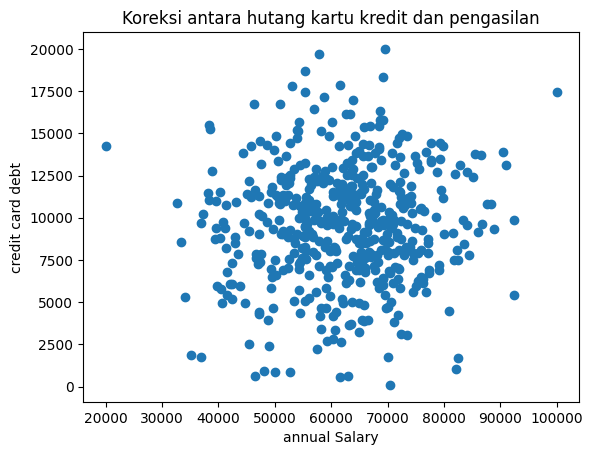

In [6]:
plt.scatter(df['annual Salary'] , df['credit card debt'])
#untuk menentukan titik data, sumbu x itu untuk nilai gaji taunan, dan sumbu y untuk tagihan kartu kredit
plt.xlabel('annual Salary')
plt.ylabel('credit card debt')
#di atas untuk mengeplot x dan y
plt.title('Koreksi antara hutang kartu kredit dan pengasilan')
#judul the corr between credit card debt and annual salary
#Dengan melihat distribusi titik data, kita mungkin dapat melihat apakah ada tren atau pola, 
#seperti gaji yang lebih tinggi yang berpotensi berhubungan dengan utang kartu kredit yang lebih tinggi 
#(atau sebaliknya).

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


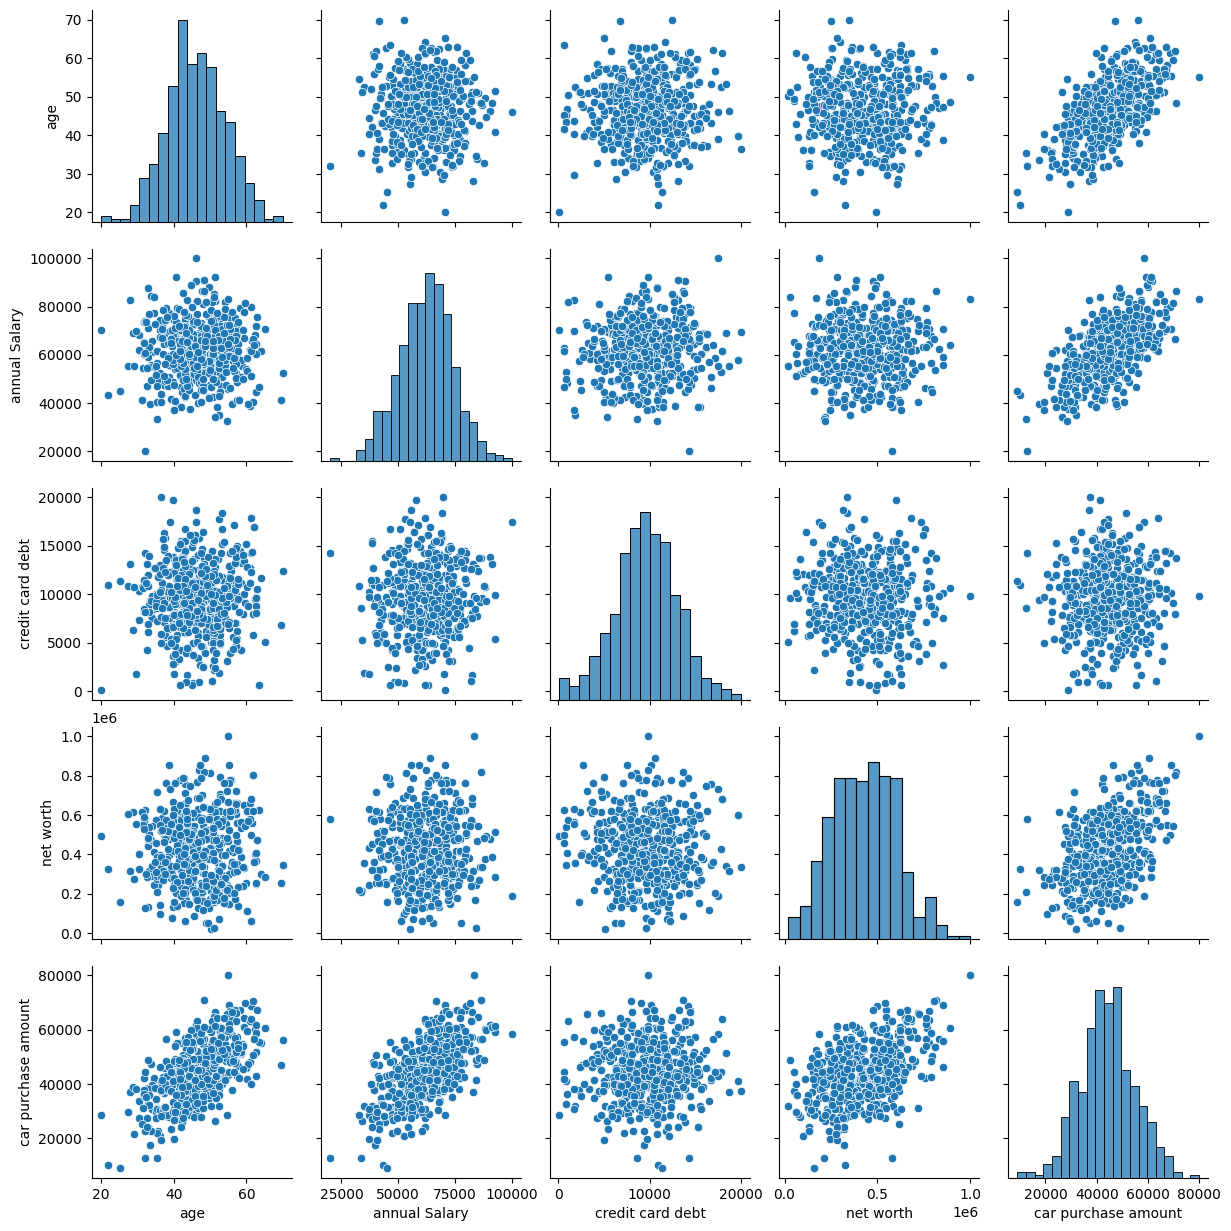

In [7]:
sns.pairplot(df)
#menampilkan visualisasi grafik grafiknya yang ada diatas tadi, dari umur, penghasilan, utang kartu kredit dan lain lain

In [9]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]
# pembersihan kode awal dan mengulang kembali untuk kode dibawah ANN
# mungkin seperti x inputnya dan y adalah target nilai

# Preprocessing

In [10]:
scale = MinMaxScaler()
X = scale.fit_transform(X)
y = scale.fit_transform(y.values.reshape(-1, 1))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)
#skala prosesnya pembelajaran programnya

# Linear regrssion

In [11]:
# Trying linear regression
lreg = LinearRegression()
lreg.fit(X_train, y_train)
print('Train score', lreg.score(X_train, y_train))
print('Test score', lreg.score(X_test, y_test))
# Kode ini melatih model regresi linier pada data yang telah disiapkan dan kemudian mengevaluasi kinerjanya pada set pelatihan dan pengujian. 
# Dengan membandingkan skor pelatihan dan pengujian, 
# kita bisa mendapatkan gambaran tentang seberapa baik model menggeneralisasi dan menghindari overfitting(terlalu spesifik).

Train score 0.9999999816374413
Test score 0.9999999793997506


In [12]:
y_pred = lreg.predict(X_test)

# ANN Model

In [13]:
ann = Sequential([Dense(32, activation="relu"),
                 Dense(1, activation='linear')])

ann.compile(optimizer='adam',
            loss='mean_squared_error',
            metrics=['mean_absolute_error'])


history = ann.fit(X_train, y_train, epochs=50, validation_split=0.2)
#epochs=50, menentukan jumlah epoch pelatihan (iterasi pada seluruh data pelatihan) yang ditetapkan ke 50, berarti 50x literasi
#mengajarinya untuk mempelajari hubungan yang mendasari antara fitur-fitur 
#di X_train dan variabel target y_train (harga mobil). 
#Tujuannya adalah agar model dapat menggunakan pengetahuan yang telah dipelajari ini untuk membuat prediksi 
#yang akurat pada data yang tidak terlihat.

Epoch 1/50
10/10 [==============================] - 1s 29ms/step - loss: 0.5932 - mean_absolute_error: 0.7446 - val_loss: 0.4420 - val_mean_absolute_error: 0.6421
Epoch 2/50
10/10 [==============================] - 0s 5ms/step - loss: 0.3495 - mean_absolute_error: 0.5648 - val_loss: 0.2416 - val_mean_absolute_error: 0.4673
Epoch 3/50
10/10 [==============================] - 0s 5ms/step - loss: 0.1811 - mean_absolute_error: 0.3945 - val_loss: 0.1128 - val_mean_absolute_error: 0.3090
Epoch 4/50
10/10 [==============================] - 0s 5ms/step - loss: 0.0793 - mean_absolute_error: 0.2479 - val_loss: 0.0448 - val_mean_absolute_error: 0.1785
Epoch 5/50
10/10 [==============================] - 0s 5ms/step - loss: 0.0310 - mean_absolute_error: 0.1435 - val_loss: 0.0191 - val_mean_absolute_error: 0.1105
Epoch 6/50
10/10 [==============================] - 0s 5ms/step - loss: 0.0169 - mean_absolute_error: 0.1022 - val_loss: 0.0145 - val_mean_absolute_error: 0.0997
Epoch 7/50
10/10 [=========

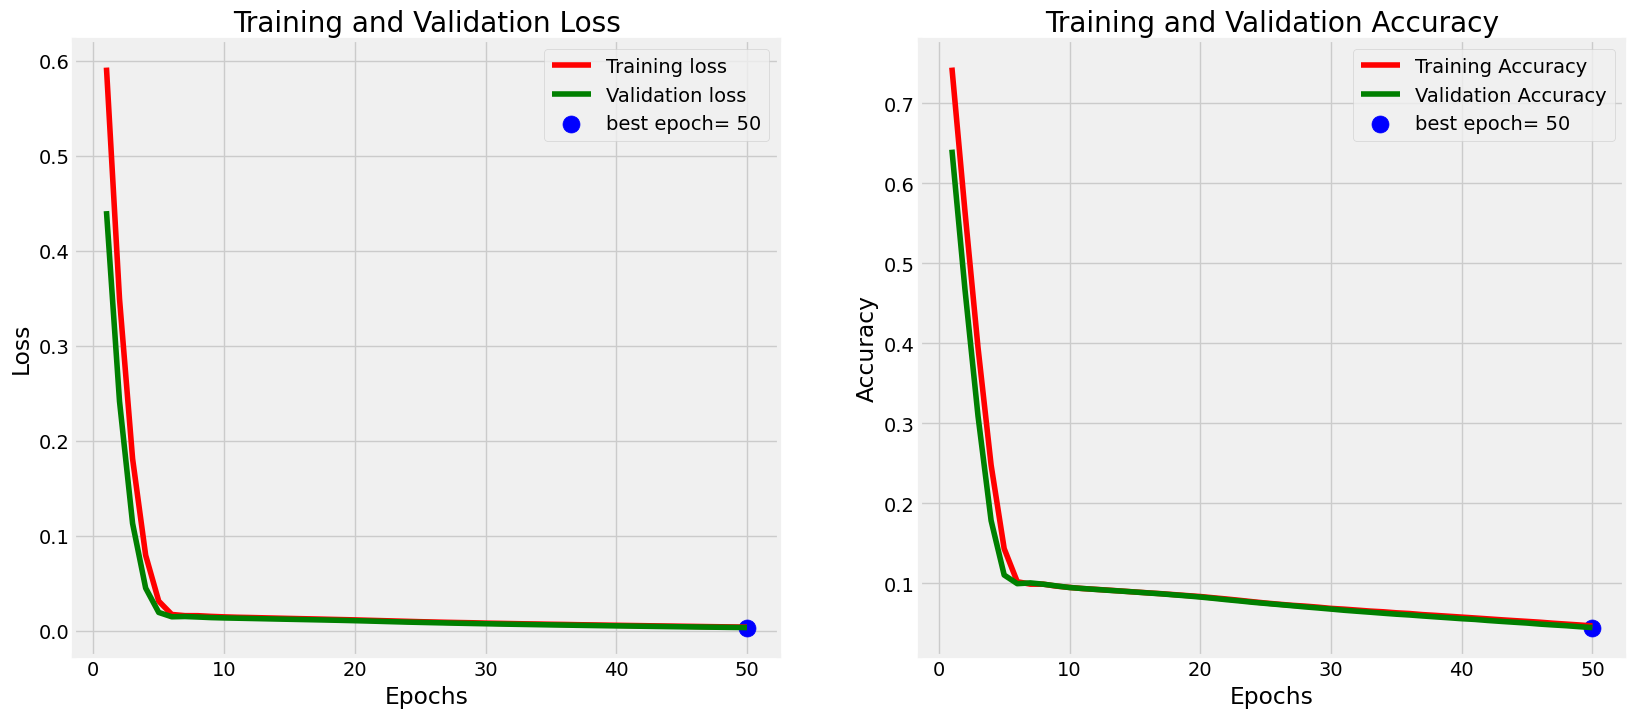

In [14]:
tr_acc = history.history['mean_absolute_error']
tr_loss = history.history['loss']
val_acc = history.history['val_mean_absolute_error']
val_loss = history.history['val_loss']
index_loss = np.argmin(val_loss)
val_lowest = val_loss[index_loss]
index_acc = np.argmin(val_acc)
acc_highest = val_acc[index_acc]
Epochs = [i+1 for i in range(len(tr_acc))]
loss_label = f'best epoch= {str(index_loss + 1)}'
acc_label = f'best epoch= {str(index_acc + 1)}'

plt.figure(figsize= (20, 8))
plt.style.use('fivethirtyeight')

plt.subplot(1, 2, 1)
plt.plot(Epochs, tr_loss, 'r', label= 'Training loss')
plt.plot(Epochs, val_loss, 'g', label= 'Validation loss')
plt.scatter(index_loss + 1, val_lowest, s= 150, c= 'blue', label= loss_label)
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(Epochs, tr_acc, 'r', label= 'Training Accuracy')
plt.plot(Epochs, val_acc, 'g', label= 'Validation Accuracy')
plt.scatter(index_acc + 1 , acc_highest, s= 150, c= 'blue', label= acc_label)
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout
plt.show()

#Loss dan validasi training menunjukkan performa model pada data yang digunakan untuk melatihnya.
#akurasi validasi menunjukkan performa model pada data yang tidak dilihatnya selama training,
#memberikan gambaran yang lebih realistis tentang kemampuan generalisasinya.
#Visualisasi ini untuk memahami proses training model ANN dan untuk memilih model terbaik

In [16]:
ann_y_pred = ann.predict(X_test)

4/4 [==============================] - 0s 2ms/step


In [17]:
r2 = r2_score(y_test, y_pred)
print('R2 score:', r2)

R2 score: 0.9999999793997506


In [18]:
ann.evaluate(X_test, y_test)

4/4 [==============================] - 0s 2ms/step - loss: 0.0037 - mean_absolute_error: 0.0489


[0.0036951240617781878, 0.04889692738652229]

In [19]:
ann.predict([[40, 70000.500, 9550,534000]])

1/1 [==============================] - 0s 38ms/step


array([[105671.805]], dtype=float32)

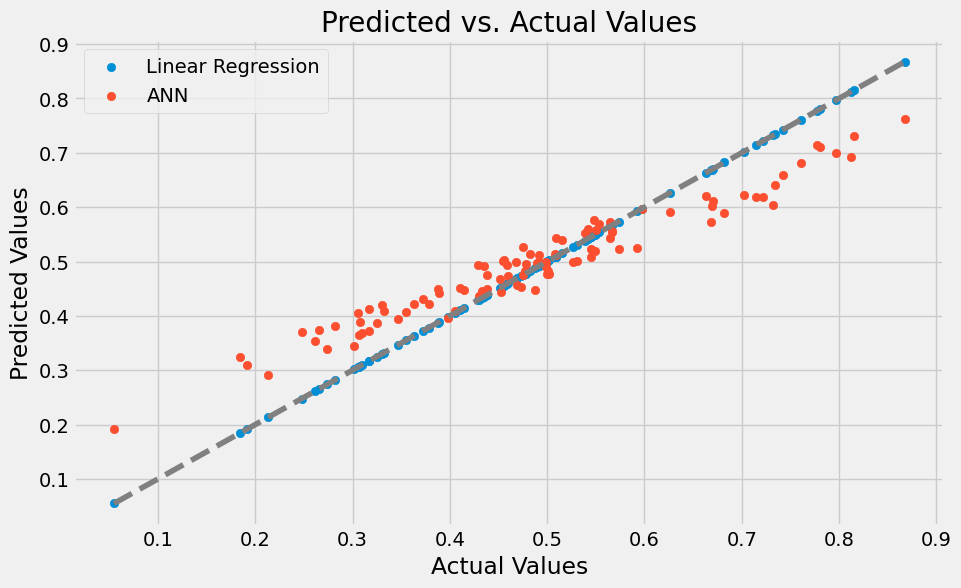

In [20]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, label='Linear Regression')
plt.scatter(y_test, ann_y_pred, label='ANN')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='gray')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs. Actual Values')
plt.legend()
plt.show()

#memperlihatkan visual linear regresi dan model ANN nya untuk di bandingkan 
#agar dapat menilai model mana yang bekerja lebih baik

In [41]:
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)
report = classification_report(y_test, y_pred)
print("\nClassification Report:")
print(report)

#gagal 1

ValueError: continuous is not supported

In [39]:
from sklearn.metrics import confusion_matrix, classification_report
y_pred_binary = (y_pred > 0.5).astype(int)
cm = confusion_matrix(y_test > 0.5, y_pred_binary)
#Set Binary untuk confusion_matrixnya

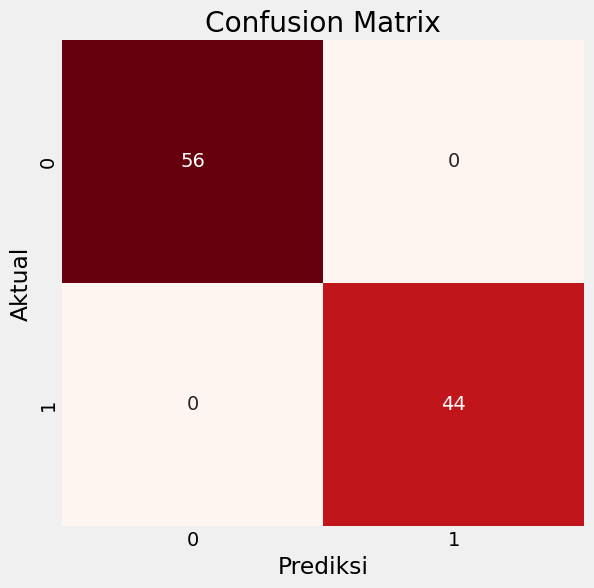

In [42]:
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', cbar=False)
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.title('Confusion Matrix')
plt.show()